In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

df = pd.read_csv('250909_D53E_d318_IMAC.csv', delimiter='\t',encoding = "UTF-16", header=2)
# Convert each column to numeric (originally objects)
df['ml']=pd.to_numeric(df['ml'], errors='coerce')
df['mAU'] =pd.to_numeric(df['mAU'], errors='coerce')
#df['ml.1'] =pd.to_numeric(df['ml.1'], errors='coerce')
#df[' mS/cm'] =pd.to_numeric(df[' mS/cm'], errors='coerce')
df['ml.1'] =pd.to_numeric(df['ml.1'], errors='coerce')
df['ml.2'] =pd.to_numeric(df['ml.2'], errors='coerce')
df['%B'] =pd.to_numeric(df['%B'], errors='coerce')

df.columns

Index(['ml', 'mAU', 'ml.1', '%B', 'ml.2', 'Fraction', 'ml.3', 'mAU.1'], dtype='object')

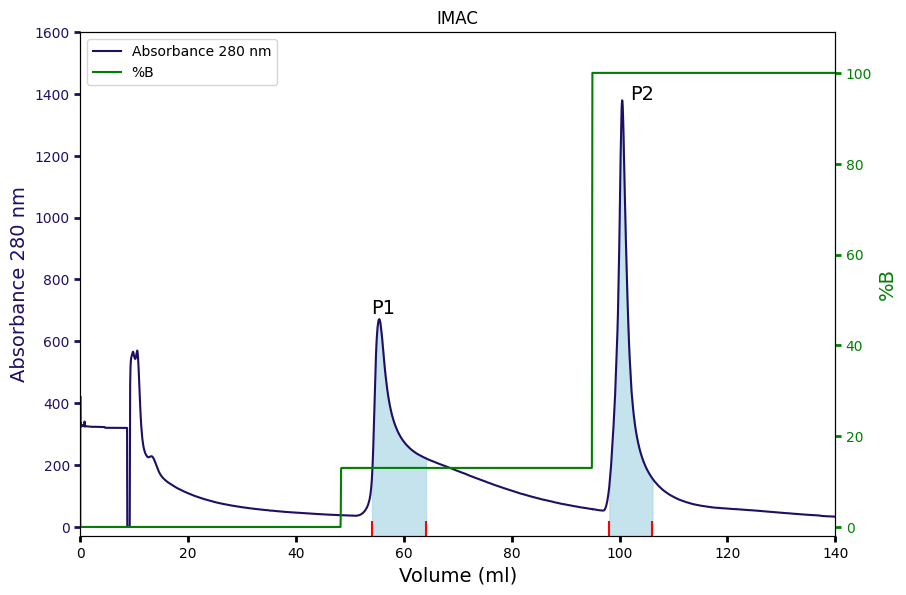

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.88, top=0.95)
fig.set_size_inches(10,6)
#genera eje x para buffer de B y setea límites
twin1 = ax.twinx()
twin1.set_ylim(-2, 109)

#grafica los datos
p1, = ax.plot(df['ml'], df['mAU'], "#200e63", label="Absorbance 280 nm")
p2, = twin1.plot(df['ml.1'], df['%B'], "g-", label="%B")

ax.set_xlim(0, 140)
ax.set_ylim(-30, 1600)

#defino donde poner líneas verticales, puede ser para fracciones colectadas o de muestras para gel
#plt.vlines(x = [160.39, 177.4 ], ymin = [73,60], ymax = [79,66],
#    colors = 'black')


### Rellenar área bajo la curva donde se toman las fracciones
regions = [(54.11, 64.11), (98.11,  106.11)]
for start, end in regions:
    ax.vlines([start, end], -100, 20, colors='red')

# Fill areas under the curve for specified regions
for start, end in regions:
    mask = (df['ml'] >= start) & (df['ml'] <= end)
    ax.fill_between(df['ml'], df['mAU'], where=mask, color='lightblue', y2= -50, alpha=0.7)

        
ax.set_xlabel("Volume (ml)", fontsize=14)
ax.set_ylabel("Absorbance 280 nm", fontsize=14)
twin1.set_ylabel("%B", fontsize=14)

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())

tkw = dict(size=4, width=2)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)

ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2], loc="upper left")
ax.set_title('IMAC')
#Indico texto a agregar. se atribuyen coordenadas según el eje indicado 
twin1.text(54, 47, 'P1', fontsize=14)
twin1.text(102, 94, 'P2', fontsize=14)
#plt.savefig('IMAC_LvrC_D53E_d318.svg')